In [1]:
# 구글에서 '서울시 자치구 년도별 CCTV 설치 현황' 검색 -> 들어가서 오른쪽에 내려받기로 받음
# 구글에서 '서울시 서울통계' 검색 -> 맨위(https://data.seoul.go.kr/dataService/boardList.do) -> 주민등록인구 -> 주민등록인구(구별)
# -> 구별 통계 나오는데 쭉 내려서 2021.2/4분기 나옴 -> 표 나옴 -> 내려받기(TXT)로 다운(report.txt) -> 보기 편하니까 창은 놔둠(txt로 보기 불편하니까)
# report.txt -> 이름 변경 -> population.txt
# 위 2개 파일을 소스가 있는쪽 data 폴더에 넣기(D:\GIL\programming\Python_teacher_2\JupyterNotebook\data)
# 아톰으로 csv 열면 다 깨짐(=UTF 인코딩) -> 인코딩이 다름 -> 엑셀로 열면 정상적으로 나옴(얘는 인코딩이 cp949라는 소리)
# 그런 얘를 이제 가져와 보자고

In [2]:
import numpy as np
import pandas as pd

In [3]:
cctv_seoul = pd.read_csv('data/서울시 CCTV 설치운영 현황(자치구)-연도별.csv',\
                        header=1, thousands=',', encoding='cp949')# header=1, -> 첫즐은 쓸모없는 데이터(header), 이걸 빼고 불러오고 싶음
# thousands=',' -> 1000단위 콤마를 숫자로 바로 읽어오기 -> 이러면 지가 알아서 콤마 빼고 읽어옴
# encoding='cp949' -> 그리고 인코딩 안하면 아까처럼 다 깨짐, 이건 cp949

In [4]:
cctv_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구분        26 non-null     object
 1   총계        26 non-null     int64 
 2   2011년 이전  26 non-null     int64 
 3   2011년     26 non-null     int64 
 4   2012년     26 non-null     int64 
 5   2013년     26 non-null     int64 
 6   2014년     26 non-null     int64 
 7   2015년     26 non-null     int64 
 8   2016년     26 non-null     int64 
 9   2017년     26 non-null     int64 
 10  2018년     26 non-null     int64 
 11  2019년     26 non-null     int64 
 12  2020년     26 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 2.8+ KB


In [5]:
cctv_seoul.head()

,구분,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
0,계,75431,5901,1619,2228,0,4368,6742,8300,10100,9687,11657,10232
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중 구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456


In [8]:
cctv_seoul.drop([0], inplace=True)  # drop= 날릴때

In [9]:
cctv_seoul.head()

,구분,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중 구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456
5,광진구,2556,11,24,57,100,187,98,52,675,465,712,175


In [12]:
cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'},\
                           inplace=True)  # column 이름 바꿀때는 rename 쓴다

In [13]:
cctv_seoul.head()

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중 구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456
5,광진구,2556,11,24,57,100,187,98,52,675,465,712,175


In [17]:
# 위에 2줄 삭제 => header=2
pop_seoul =pd.read_csv('data/population.txt', header=2,\
                       delim_whitespace=True, thousands=',')
# 이 데이터는 data와 data 사이가 콤마가 아니라 공란(space)로 되어있음 -> 구분자(delim)
# 그리고 천단위 콤마 있으므로 thousands=','  추가
# 얘는 UTF 로 인코딩되어있음 -> 아톰으로 바로 정상적으로 열리면 UTF임.

In [20]:
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기간        26 non-null     object 
 1   자치구       26 non-null     object 
 2   세대        26 non-null     int64  
 3   계         26 non-null     int64  
 4   남자        26 non-null     int64  
 5   여자        26 non-null     int64  
 6   계.1       26 non-null     int64  
 7   남자.1      26 non-null     int64  
 8   여자.1      26 non-null     int64  
 9   계.2       26 non-null     int64  
 10  남자.2      26 non-null     int64  
 11  여자.2      26 non-null     int64  
 12  세대당인구     26 non-null     float64
 13  65세이상고령자  26 non-null     int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 3.0+ KB


In [19]:
pop_seoul.head()  # 예도 합계가 첫줄에 있음  -> 필요 없음 -> 첫줄 삭제 => drop[0]

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2021.2/4,합계,4405638,9795426,4756178,5039248,9565990,4649442,4916548,229436,106736,122700,2.17,1576971
1,2021.2/4,종로구,73525,155106,75009,80097,146029,70985,75044,9077,4024,5053,1.99,27605
2,2021.2/4,중구,62897,132259,64526,67733,123016,60019,62997,9243,4507,4736,1.96,23980
3,2021.2/4,용산구,111650,240665,116858,123807,226378,108948,117430,14287,7910,6377,2.03,38884
4,2021.2/4,성동구,134542,295767,143927,151840,289162,141042,148120,6605,2885,3720,2.15,45591


In [21]:
pop_seoul.drop([0], inplace=True)  # 이거 2번 실행하면 에러남 -> 2번 날라가니까(1번씩 2번), 첫번째 날라가서 이미 없으므로 에러남
pop_seoul.head()  # -> 인덱스[0]번이 삭제되었는데 -> 다시 인덱스[0]번을 삭제하라고 하니까  -> 없는걸 삭제하라고 하니까 에러

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
1,2021.2/4,종로구,73525,155106,75009,80097,146029,70985,75044,9077,4024,5053,1.99,27605
2,2021.2/4,중구,62897,132259,64526,67733,123016,60019,62997,9243,4507,4736,1.96,23980
3,2021.2/4,용산구,111650,240665,116858,123807,226378,108948,117430,14287,7910,6377,2.03,38884
4,2021.2/4,성동구,134542,295767,143927,151840,289162,141042,148120,6605,2885,3720,2.15,45591
5,2021.2/4,광진구,166957,355306,170624,184682,342481,165233,177248,12825,5391,7434,2.05,50815


In [22]:
# 쓸대 없는 column이 너무 많음 -> 정리할 것
# 기간 날리고, 세대 날리고, 통계만 필요하니 남자, 여자 날릴 것. -> 근데 남자여자 계속 나옴(합계, 한국인, 외국인 등의 남여 날릴 것)
# 세대당 인구도 날릴 것

In [23]:
# 삭제하는 방법 2가지.  drop, del
# del : 칼럼으로 삭제하겠다는 것
pop_seoul.drop(['기간', '세대', '남자', '여자', '남자.1', \
               '여자.1', '남자.2', '여자.2', '세대당인구']\
              , axis=1, inplace=True)

# del pop_seoul['기간']
# del pop_seoul['세대']    -> 이런 방법도 가능

In [24]:
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
1,종로구,155106,146029,9077,27605
2,중구,132259,123016,9243,23980
3,용산구,240665,226378,14287,38884
4,성동구,295767,289162,6605,45591
5,광진구,355306,342481,12825,50815


In [25]:
# 위의 5개를 -> 구별 인구수 한국인 외국인 고령자  <- 이렇게 5개로 바꿀 것.  -> rename으로 이름 변경 가능
pop_seoul.rename(columns={pop_seoul.columns[0]: '구별', \
                         pop_seoul.columns[1]: '인구수',\
                         pop_seoul.columns[2]: '한국인',\
                         pop_seoul.columns[3]: '외국인',\
                         pop_seoul.columns[4]: '고령자'},\
                inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,155106,146029,9077,27605
2,중구,132259,123016,9243,23980
3,용산구,240665,226378,14287,38884
4,성동구,295767,289162,6605,45591
5,광진구,355306,342481,12825,50815


In [26]:
# 나중에 동일한 구별로 merge 시키려고 맞춘 것.
cctv_seoul.head()

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중 구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456
5,광진구,2556,11,24,57,100,187,98,52,675,465,712,175


In [27]:
# 여러분이 최종 데이터는 확인해야 함.  -> 방법
cctv_seoul['구별'].unique()  # 여긴 '중 구'로 떨어져있음

array(['종로구', '중 구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [29]:
pop_seoul['구별'].unique()   # '중구'로 붙어있음

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [32]:
cctv_seoul.head()

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중 구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456
5,광진구,2556,11,24,57,100,187,98,52,675,465,712,175


In [33]:
cctv_seoul.head(10)

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중 구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456
5,광진구,2556,11,24,57,100,187,98,52,675,465,712,175
6,동대문구,2315,960,130,146,60,29,111,233,136,197,209,104
7,중랑구,3285,298,21,23,253,88,138,159,152,173,1050,930
8,성북구,3754,42,41,87,174,230,323,587,461,860,716,233
9,강북구,2462,0,0,0,55,85,130,311,34,385,976,486
10,도봉구,1356,0,49,29,96,181,79,159,134,223,214,192


In [34]:
# 특정 데이터 하나 선택하기 -> 에서 힌트를 받아야 함.
# 데이터가 많으면 일일이 index.set을 할 순 없음
# print(df_KTX.loc['index명', 'column명'])  -> row가 적으니까 가능 -> 수백, 수천개면 힘듬
# print(df_KTX.loc['2016', '호남선 KTX'])  # <- ex)    /  그럴땐 아래처럼 함
cctv_seoul.loc[cctv_seoul['구별'] == '중 구', '구별'] = '중구'
cctv_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [36]:
cctv_seoul.head()

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456
5,광진구,2556,11,24,57,100,187,98,52,675,465,712,175


In [37]:
# 가장 많은것 -> sort로 정렬
cctv_seoul.sort_values(by='총계', ascending=False)

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
23,강남구,6645,62,61,72,368,455,845,1307,1004,744,796,931
21,관악구,4909,320,120,84,431,441,608,620,684,674,596,331
17,구로구,4075,643,209,216,349,187,268,326,540,488,434,415
19,영등포구,3773,450,122,136,238,123,209,248,311,658,65,1213
8,성북구,3754,42,41,87,174,230,323,587,461,860,716,233
22,서초구,3730,0,117,72,93,71,563,516,1061,436,361,440
12,은평구,3660,14,0,3,44,332,329,555,403,635,1057,288
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456
15,양천구,3307,1217,282,175,201,173,193,351,120,142,255,198
7,중랑구,3285,298,21,23,253,88,138,159,152,173,1050,930


In [38]:
# cctv 가장 적은 곳 찾기
cctv_seoul.sort_values(by='총계')  # , ascending=False -> 요놈을 빼주면 됨

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
10,도봉구,1356,0,49,29,96,181,79,159,134,223,214,192
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중구,2001,16,6,199,90,125,218,333,462,228,194,130
20,동작구,2262,165,73,93,29,503,130,254,278,255,242,240
11,노원구,2282,0,0,90,105,109,605,405,256,201,240,271
6,동대문구,2315,960,130,146,60,29,111,233,136,197,209,104
18,금천구,2365,0,0,0,178,80,361,133,196,540,369,508
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
14,마포구,2401,270,66,93,77,61,162,350,358,340,384,240
16,강서구,2437,26,29,129,106,213,188,168,506,259,457,356


In [97]:
# 최근 증가율 2016년 대비 2016~2020 설치한 cctv 증가율
# 수학적으로 나타내면 이렇게 됨  ->  2016~2020 / ~ 2015 * 100
# column 끼리 연산하면 됨.   pandas에서 column 증가시키는걸 했음 -> 증거 -> 
# bmi = df_WH['Weight']/(df_WH['Height']/100)**2
# df_WH['BMI'] = bmi   -> 이렇게 했었음 -> 이거 응용하면 됨

cctv_seoul['최근증가율'] = (cctv_seoul['2016년'] + \
                      cctv_seoul['2017년'] + \
                      cctv_seoul['2018년'] + \
                      cctv_seoul['2019년'] + \
                      cctv_seoul['2020년']) / \
                        ( cctv_seoul['2011년 이전'] + \
                        cctv_seoul['2011년'] + \
                        cctv_seoul['2012년'] + \
                        cctv_seoul['2013년'] + \
                        cctv_seoul['2014년'] + \
                        cctv_seoul['2015년']) * 100
cctv_seoul.head()

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,최근증가율
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200,47.148936
2,중구,2001,16,6,199,90,125,218,333,462,228,194,130,205.963303
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617,247.883212
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456,172.692009
5,광진구,2556,11,24,57,100,187,98,52,675,465,712,175,435.849057


In [40]:
cctv_seoul.sort_values(by='최근증가율', ascending=False)

# 2013년도부터 성북? 에서 강북이 떨어져 나옴.  금천도 새로 생김. 그래서 요 2개는 2012년까지 cctv개수가 0개임

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,최근증가율
9,강북구,2462,0,0,0,55,85,130,311,34,385,976,486,811.851852
5,광진구,2556,11,24,57,100,187,98,52,675,465,712,175,458.940397
24,송파구,2743,64,9,61,86,85,215,146,241,542,1068,226,435.029354
12,은평구,3660,14,0,3,44,332,329,555,403,635,1057,288,406.925208
22,서초구,3730,0,117,72,93,71,563,516,1061,436,361,440,352.190238
8,성북구,3754,42,41,87,174,230,323,587,461,860,716,233,333.761682
7,중랑구,3285,298,21,23,253,88,138,159,152,173,1050,930,308.000000
18,금천구,2365,0,0,0,178,80,361,133,196,540,369,508,282.067851
25,강동구,2547,223,45,27,227,49,154,202,273,377,356,614,267.941176
23,강남구,6645,62,61,72,368,455,845,1307,1004,744,796,931,265.371809


In [41]:
pop_seoul.head()  # 인구 데이터

,구별,인구수,한국인,외국인,고령자
1,종로구,155106,146029,9077,27605
2,중구,132259,123016,9243,23980
3,용산구,240665,226378,14287,38884
4,성동구,295767,289162,6605,45591
5,광진구,355306,342481,12825,50815


In [43]:
# 각각 여디다가 column을 2개 추가
# 콜럼 이름을 -> 외국인비율, 고령자비율
pop_seoul['외국인비율'] = pop_seoul['외국인'] / \
                        pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / \
                        pop_seoul['인구수'] * 100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,155106,146029,9077,27605,5.852127,17.797506
2,중구,132259,123016,9243,23980,6.988560,18.131091
3,용산구,240665,226378,14287,38884,5.936468,16.156899
4,성동구,295767,289162,6605,45591,2.233177,15.414499
5,광진구,355306,342481,12825,50815,3.609565,14.301757


In [44]:
pop_seoul.sort_values(by='인구수', ascending=False)  # 인구수 기준 정렬

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,664341,658670,5671,95164,0.853628,14.324571
16,강서구,582995,577519,5476,90404,0.939288,15.506823
23,강남구,536107,531375,4732,76184,0.882660,14.210596
11,노원구,520005,515997,4008,86697,0.770762,16.672340
21,관악구,502698,488800,13898,78647,2.764682,15.644980
12,은평구,479409,475371,4038,85921,0.842287,17.922275
25,강동구,469094,465209,3885,72275,0.828192,15.407360
15,양천구,454288,450992,3296,66942,0.725531,14.735586
8,성북구,443206,433658,9548,73568,2.154303,16.599053
17,구로구,424582,399266,25316,71186,5.962570,16.766137


In [45]:
# 어느 동네에 외국인수가 많은지
pop_seoul.sort_values(by='외국인', ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
17,구로구,424582,399266,25316,71186,5.962570,16.766137
19,영등포구,402375,377421,24954,61571,6.201678,15.301895
18,금천구,244685,230168,14517,40181,5.932934,16.421522
3,용산구,240665,226378,14287,38884,5.936468,16.156899
6,동대문구,352259,338040,14219,61262,4.036519,17.391181
21,관악구,502698,488800,13898,78647,2.764682,15.644980
5,광진구,355306,342481,12825,50815,3.609565,14.301757
13,서대문구,317699,307070,10629,53627,3.345620,16.879814
14,마포구,379984,370132,9852,53891,2.592741,14.182439
8,성북구,443206,433658,9548,73568,2.154303,16.599053


In [46]:
# 외국인 비율로 하는게 좀 더 합리적인듯 -> 외국인 비율로 봅시다
pop_seoul.sort_values(by='외국인비율', ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,중구,132259,123016,9243,23980,6.988560,18.131091
19,영등포구,402375,377421,24954,61571,6.201678,15.301895
17,구로구,424582,399266,25316,71186,5.962570,16.766137
3,용산구,240665,226378,14287,38884,5.936468,16.156899
18,금천구,244685,230168,14517,40181,5.932934,16.421522
1,종로구,155106,146029,9077,27605,5.852127,17.797506
6,동대문구,352259,338040,14219,61262,4.036519,17.391181
5,광진구,355306,342481,12825,50815,3.609565,14.301757
13,서대문구,317699,307070,10629,53627,3.345620,16.879814
21,관악구,502698,488800,13898,78647,2.764682,15.644980


In [47]:
# 이번엔 고령자가 어디가 많은가
pop_seoul.sort_values(by='고령자', ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,664341,658670,5671,95164,0.853628,14.324571
16,강서구,582995,577519,5476,90404,0.939288,15.506823
11,노원구,520005,515997,4008,86697,0.770762,16.672340
12,은평구,479409,475371,4038,85921,0.842287,17.922275
21,관악구,502698,488800,13898,78647,2.764682,15.644980
23,강남구,536107,531375,4732,76184,0.882660,14.210596
8,성북구,443206,433658,9548,73568,2.154303,16.599053
25,강동구,469094,465209,3885,72275,0.828192,15.407360
17,구로구,424582,399266,25316,71186,5.962570,16.766137
7,중랑구,394679,389972,4707,70172,1.192615,17.779512


In [48]:
# 이것도 고령자 비율로 볼 필요가 있음. 이게 합리적
pop_seoul.sort_values(by='고령자비율', ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,306093,302645,3448,63383,1.126455,20.707105
10,도봉구,322419,320365,2054,62894,0.637059,19.506915
2,중구,132259,123016,9243,23980,6.988560,18.131091
12,은평구,479409,475371,4038,85921,0.842287,17.922275
1,종로구,155106,146029,9077,27605,5.852127,17.797506
7,중랑구,394679,389972,4707,70172,1.192615,17.779512
6,동대문구,352259,338040,14219,61262,4.036519,17.391181
13,서대문구,317699,307070,10629,53627,3.345620,16.879814
17,구로구,424582,399266,25316,71186,5.962570,16.766137
11,노원구,520005,515997,4008,86697,0.770762,16.672340


In [49]:
# 2개의 데이터를 합칩시다
data_result = pd.merge(cctv_seoul, pop_seoul, on='구별')  # 2개를 merge 하는데 어떤 칼럼으로 => , on='구별'
data_result.head()

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1729,216,7,10,582,210,150,1,259,85,9,200,47.431507,155106,146029,9077,27605,5.852127,17.797506
1,중구,2001,16,6,199,90,125,218,333,462,228,194,130,207.870370,132259,123016,9243,23980,6.988560,18.131091
2,용산구,2383,31,3,71,234,125,221,298,351,125,307,617,248.973607,240665,226378,14287,38884,5.936468,16.156899
3,성동구,3515,487,26,122,207,112,335,309,790,409,262,456,176.247031,295767,289162,6605,45591,2.233177,15.414499
4,광진구,2556,11,24,57,100,187,98,52,675,465,712,175,458.940397,355306,342481,12825,50815,3.609565,14.301757


In [52]:
# 필요없는 column -> 2011년 이전~2020년까지 다 날려보자 -> drop이나  del로 원하는걸로 날려보자
data_result.drop(['2011년 이전', '2011년', '2012년', '2013년', \
                 '2014년', '2015년', '2016년', \
                 '2017년', '2018년', '2019년', '2020년'], \
                axis=1, inplace=True)
data_result.head()

,구별,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1729,47.431507,155106,146029,9077,27605,5.852127,17.797506
1,중구,2001,207.870370,132259,123016,9243,23980,6.988560,18.131091
2,용산구,2383,248.973607,240665,226378,14287,38884,5.936468,16.156899
3,성동구,3515,176.247031,295767,289162,6605,45591,2.233177,15.414499
4,광진구,2556,458.940397,355306,342481,12825,50815,3.609565,14.301757


In [53]:
data_result.set_index('구별', inplace=True)
data_result.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1729,47.431507,155106,146029,9077,27605,5.852127,17.797506
중구,2001,207.870370,132259,123016,9243,23980,6.988560,18.131091
용산구,2383,248.973607,240665,226378,14287,38884,5.936468,16.156899
성동구,3515,176.247031,295767,289162,6605,45591,2.233177,15.414499
광진구,2556,458.940397,355306,342481,12825,50815,3.609565,14.301757


In [54]:
# 상관계수
np.corrcoef(data_result['고령자비율'], data_result['총계'])  # 2개의 상관관계
# 상관계수 0.3 이상일때 의미 있음, 0.7 이상일때 강한 상관관계
# 음수면 없다는거

array([[ 1.        , -0.41781759],
       [-0.41781759,  1.        ]])

In [55]:
np.corrcoef(data_result['외국인비율'], data_result['총계']) # 얘들은 상관 없음

array([[ 1.        , -0.17319383],
       [-0.17319383,  1.        ]])

In [56]:
np.corrcoef(data_result['인구수'], data_result['총계']) # 얘는 0.45가 나왔으니 상관관계가 있다고 충분히 말 할 수 있음

array([[1.        , 0.45303154],
       [0.45303154, 1.        ]])

In [57]:
# conda install seaborn  -> 설치해주자  -> 설치했으면 import 해주자.
import seaborn as sns
import matplotlib.pyplot as plt   #  그림 그려줄거니까 얘도 import

In [58]:
# 저번에 준 그래프에 한글 쓰는거 가져와서 그대로 붙여넣음시다.
import platform
from matplotlib import font_manager, rc # Runtime Configuration

path = "c:/Windows/Fonts/malgun.ttf"  # Windows 밑에있는 맑은 폰트
if platform.system() == 'Darwin':  
    rc('font', family='AppleGothic')   # 맥일 경우 애플 고딕
elif platform.system() == 'Windows':  # Window면 
    font_name = font_manager.FontProperties(fname=path).get_name()   #  path를 쓰겠다는 것
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')   # 이도저도 아니면 에러

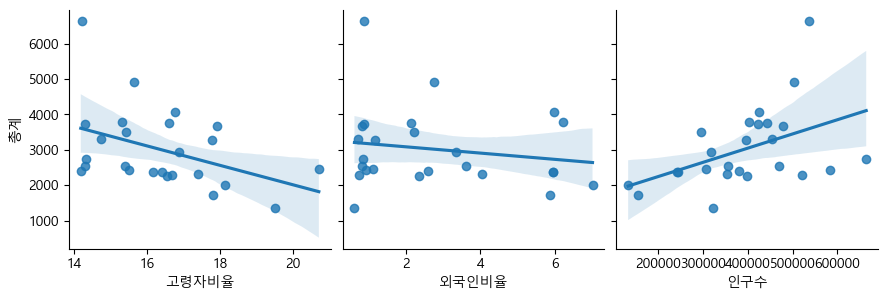

In [59]:
sns.pairplot(data_result, x_vars=['고령자비율', '외국인비율', '인구수'],
            y_vars=['총계'], kind='reg', height=3)  #  height -> 그래프를 그릴 때, 눈금을 inch당 몇개를 들어가게 할거냐(여기선 단위당 3개)
plt.show()

# 인구수와는 상관관계가 있다고 나오는 것. (고령자, 외국인비율은 상관관계 없다는 것)
# 결론 -> 전체 인구수와 cctv 대수는 상관관계가 있다.

In [60]:
data_result.sort_values(by='총계', ascending=False)

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,6645,265.371809,536107,531375,4732,76184,0.882660,14.210596
관악구,4909,154.193206,502698,488800,13898,78647,2.764682,15.644980
구로구,4075,132.471437,424582,399266,25316,71186,5.962570,16.766137
영등포구,3773,215.830450,402375,377421,24954,61571,6.201678,15.301895
성북구,3754,333.761682,443206,433658,9548,73568,2.154303,16.599053
서초구,3730,352.190238,422174,418407,3767,60395,0.892286,14.305713
은평구,3660,406.925208,479409,475371,4038,85921,0.842287,17.922275
성동구,3515,176.247031,295767,289162,6605,45591,2.233177,15.414499
양천구,3307,54.415518,454288,450992,3296,66942,0.725531,14.735586


In [61]:
data_result.sort_values(by='인구수', ascending=False)  # 인구수도 봅시다

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,2743,435.029354,664341,658670,5671,95164,0.853628,14.324571
강서구,2437,263.746224,582995,577519,5476,90404,0.939288,15.506823
강남구,6645,265.371809,536107,531375,4732,76184,0.882660,14.210596
노원구,2282,151.045105,520005,515997,4008,86697,0.770762,16.672340
관악구,4909,154.193206,502698,488800,13898,78647,2.764682,15.644980
은평구,3660,406.925208,479409,475371,4038,85921,0.842287,17.922275
강동구,2547,267.941176,469094,465209,3885,72275,0.828192,15.407360
양천구,3307,54.415518,454288,450992,3296,66942,0.725531,14.735586
성북구,3754,333.761682,443206,433658,9548,73568,2.154303,16.599053


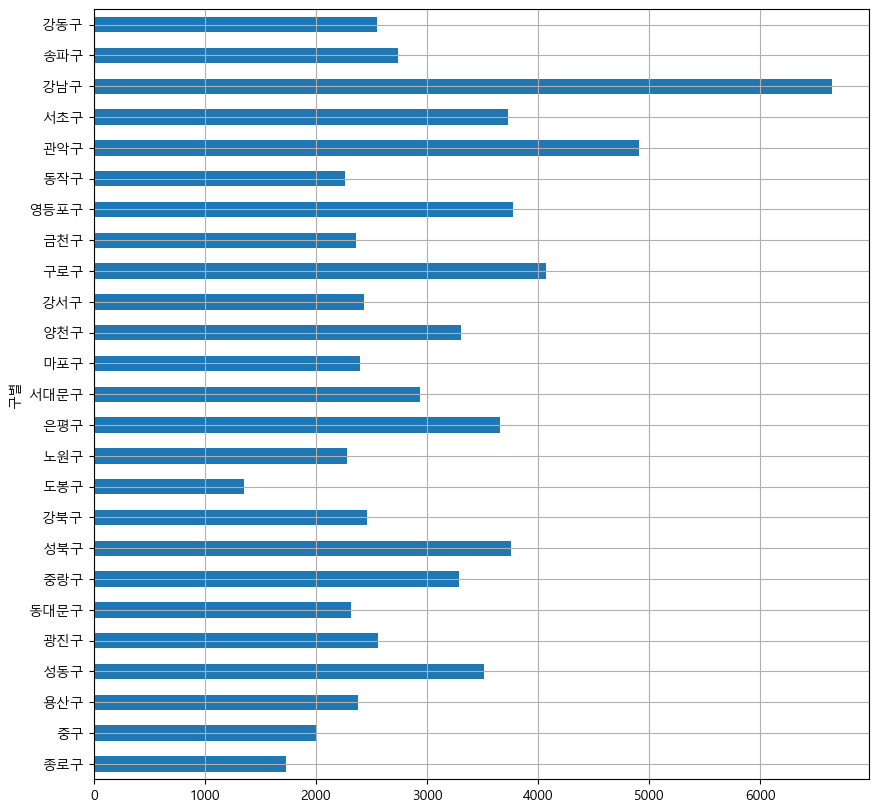

In [62]:
data_result['총계'].plot(kind='barh', grid=True, figsize=(10,10)) # data의 종류는 barh, 그리드 넣고, 사이즈는 10, 10
plt.show()

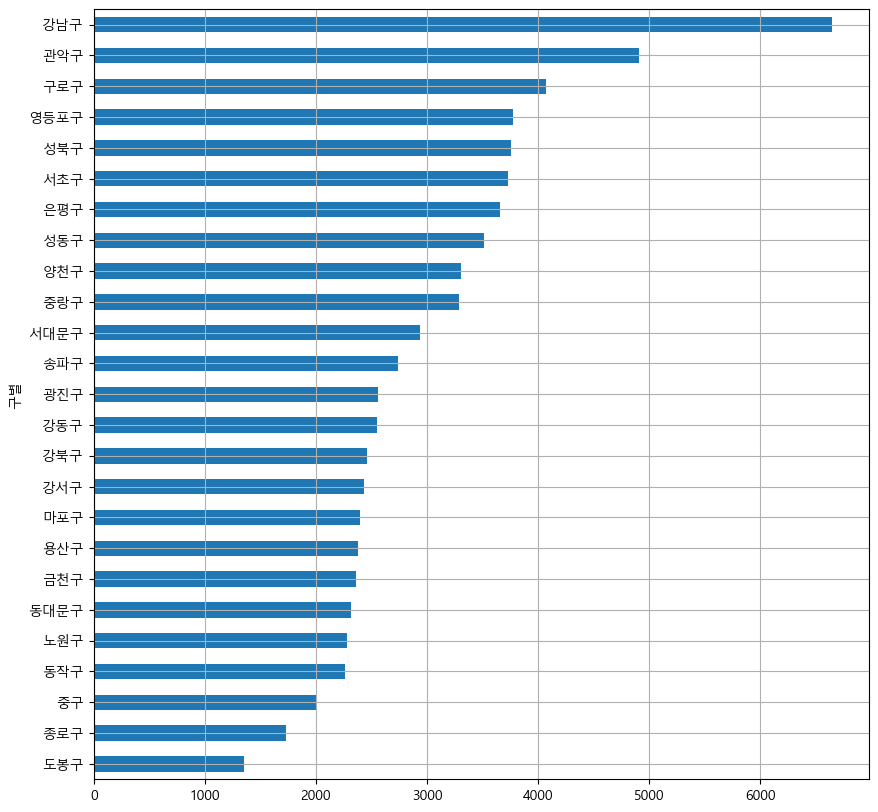

In [67]:
# 과제 : 데이터를 제일 많은거부터 쭈르륵 나오게 수정해보세요
data_result_sort = data_result.sort_values(by='총계')
data_result_sort['총계'].plot(kind='barh', grid=True, figsize=(10,10)) # data의 종류는 barh, 그리드 넣고, 사이즈는 10, 10
plt.show()

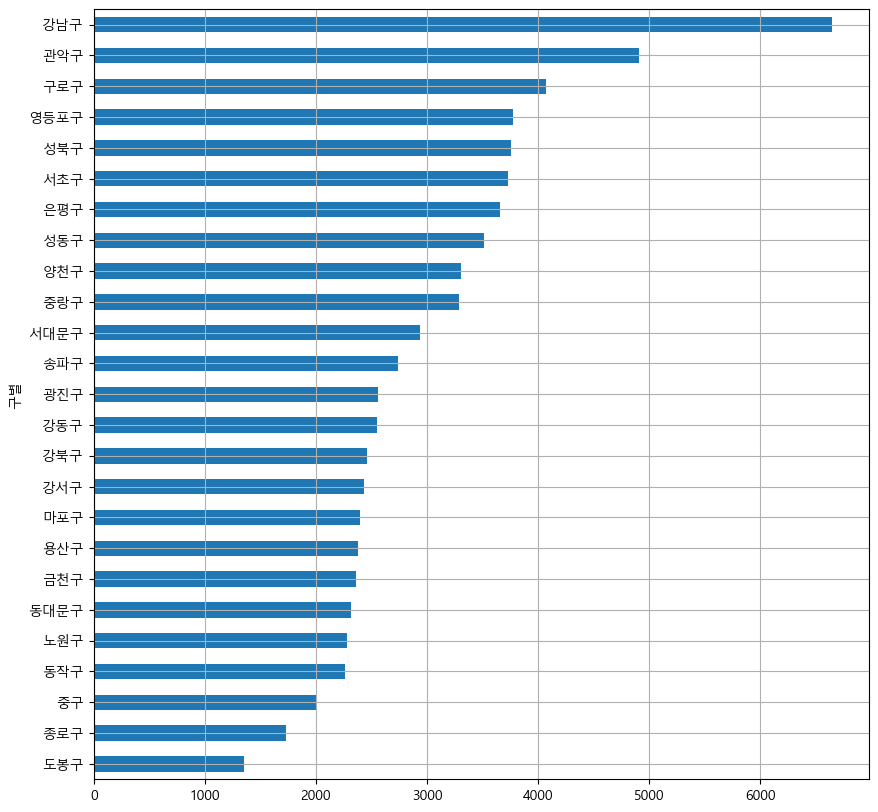

In [75]:
# 강사님 풀이
data_result['총계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

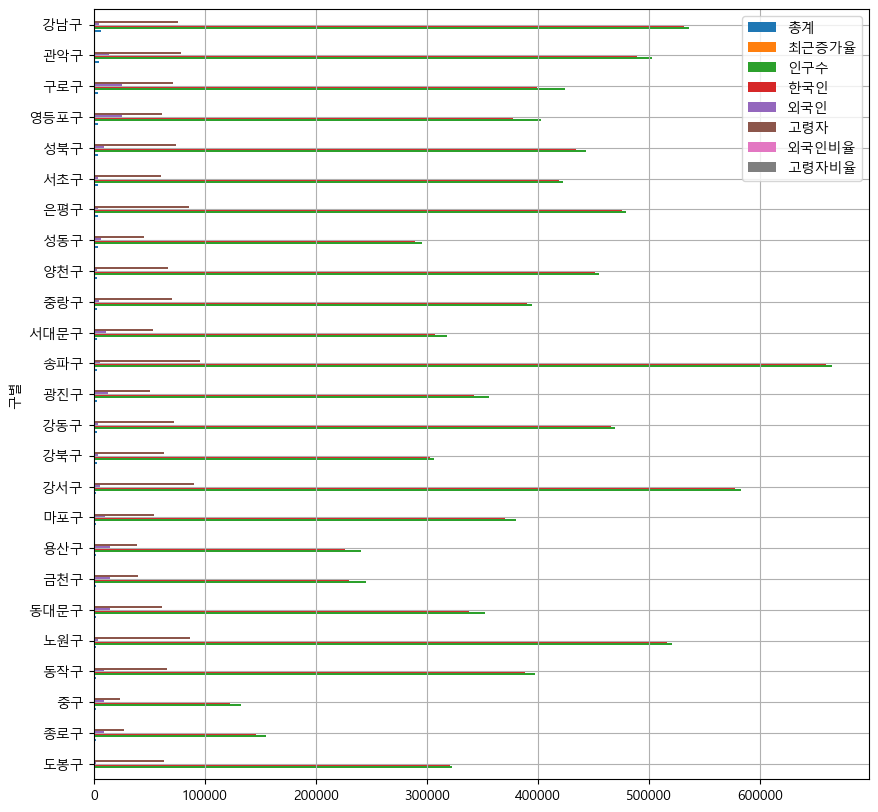

In [76]:
# 참고로 ['총계'] 지우면 이렇게 나옴
data_result_sort = data_result.sort_values(by='총계')
data_result_sort.plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

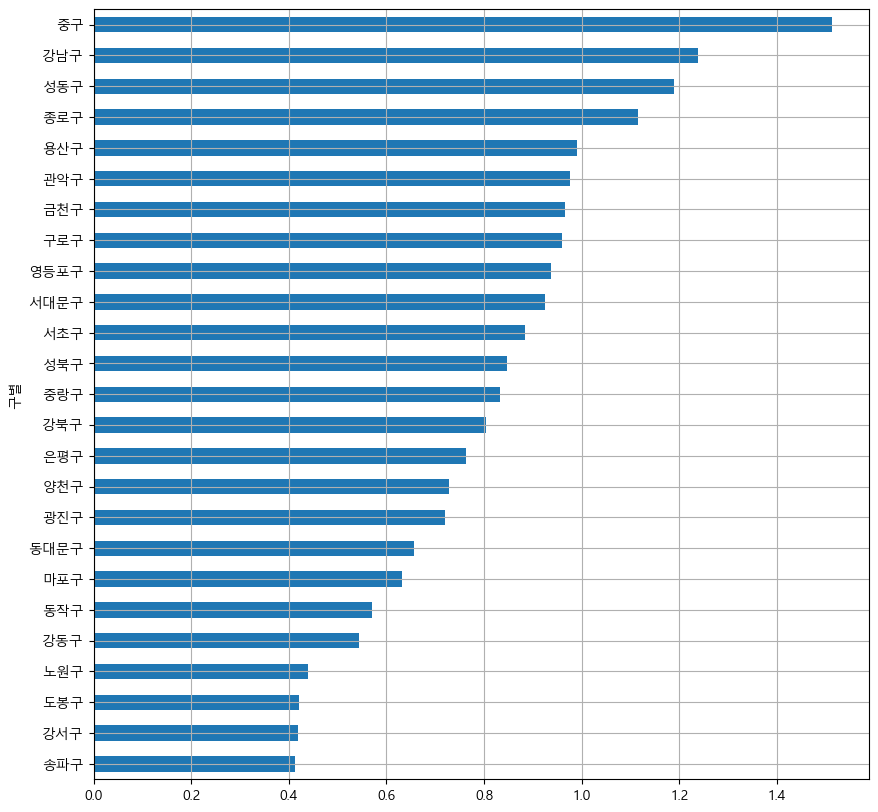

In [77]:
# cctv 비율
data_result['cctv 비율'] = data_result['총계'] / data_result['인구수'] * 100
data_result['cctv 비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

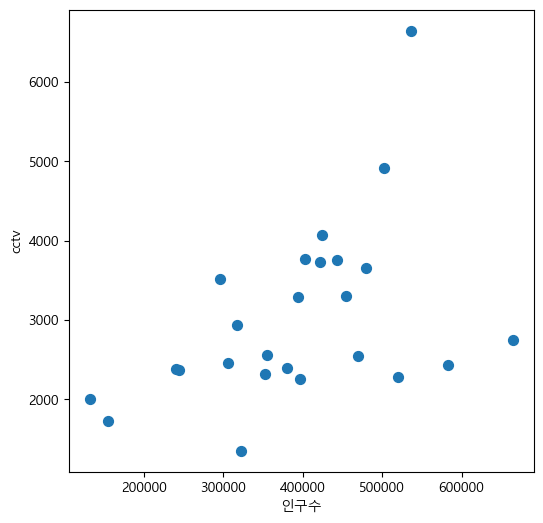

In [78]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['총계'], s=50)
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.show()

In [79]:
fp = np.polyfit(data_result['인구수'], data_result['총계'], 1)
print(fp) # 얘가 의미하는 것 ->

[4.00378646e-03 1.44848824e+03]


In [80]:
# y = ax + b  형태에서, a = 4.00378646e-03, b = 1.44848824e+03   -> 이게 퀄리티 함수라는 뜻
# 이렇게 구했으니까, 이상태에서
f1 = np.poly1d(fp) # 이 자체가 함수를 return해줌 그걸 f1이 받는 것
fx = np.linspace(100000, 700000, 100)  # linspace로 10만부터 70만까지 100등분 하기

<Figure size 1000x1000 with 0 Axes>

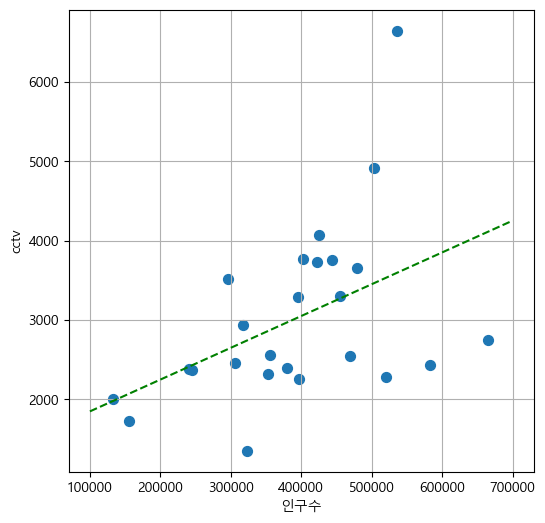

In [81]:
# 위에걸로 그림 그리기
plt.figure(figsize=(10, 10))
# 그리고 위의 scatter 그대로 붙이기
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['총계'], s=50)
#plot 추가
plt.plot(fx, f1(fx), ls='dashed', color='g')
plt.xlabel('인구수')
plt.ylabel('cctv')
#grid 추가
plt.grid()
plt.show()

# 아래 그래프를 이용하는 1차 회귀 방정식을 이용한게 이것.  ->  ? 뭔소리야

In [84]:
# 다음시간엔 위의 그레프를 가지고 얼마나 더 visual하게 꾸밀 수 있는지 해볼것

In [83]:
# 이 선을 기준으로 cctv설치의 오차가 제일 큰 10개 자치구를  구하기
data_result['오차'] = np.abs(data_result['총계'] \
                          - f1(data_result['인구수']))  # f1 이 위의 직선
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv 비율,오차
구별,,,,,,,,,,
강남구,6645,265.371809,536107,531375,4732,76184,0.882660,14.210596,1.239491,3050.053812
관악구,4909,154.193206,502698,488800,13898,78647,2.764682,15.644980,0.976531,1447.816314
도봉구,1356,239.480519,322419,320365,2054,62894,0.637059,19.506915,0.420571,1383.385067
송파구,2743,435.029354,664341,658670,5671,95164,0.853628,14.324571,0.412890,1365.367740
강서구,2437,263.746224,582995,577519,5476,90404,0.939288,15.506823,0.418014,1345.675727


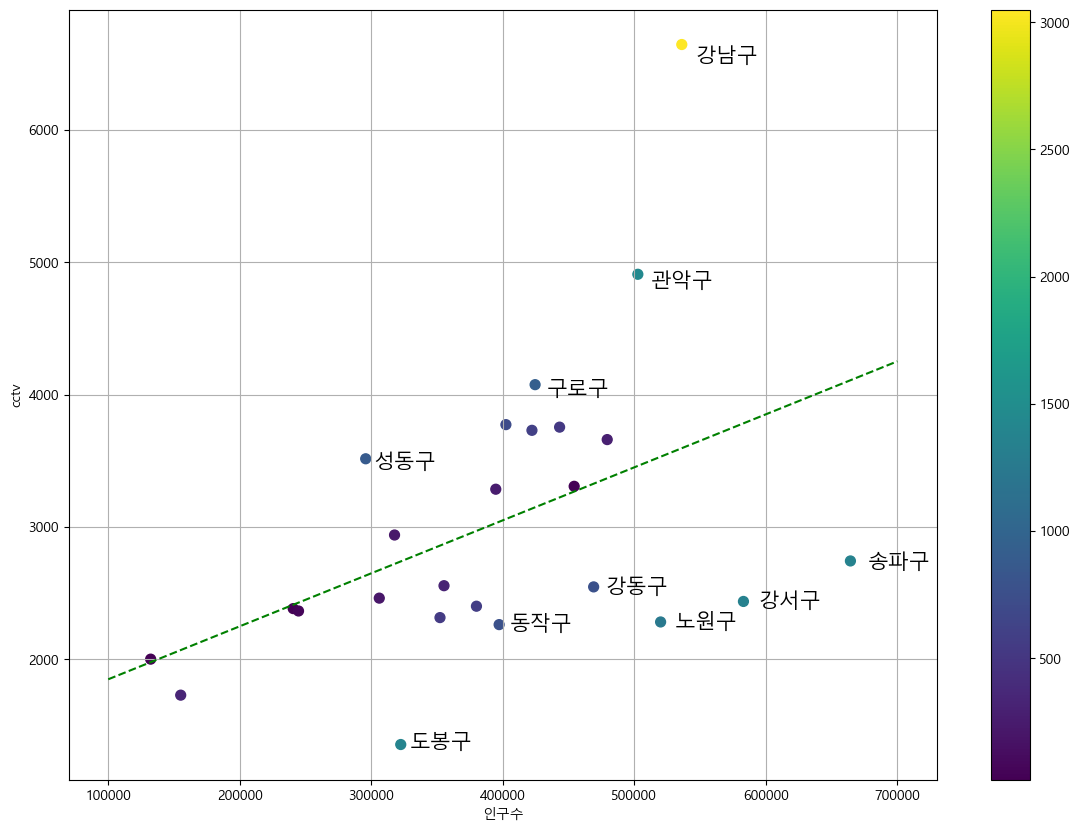

In [93]:
plt.figure(figsize=(14,10))  #  -> 아래의 그래프 전체 크기 (x=가로 크기, y=세로 크기)
plt.scatter(data_result['인구수'], data_result['총계'],\
           c=data_result['오차'], s=50)  #  scater /  오차 : 마커의 색 ,  s=50 -> 동그라미(점) 크기
plt.plot(fx, f1(fx), ls='dashed', color='g') # -> 얘가 가운데 직선

for n in range(10):  #  요부분이 핵심
    plt.text(df_sort['인구수'][n]*1.02, df_sort['총계'][n]*0.98,\
            df_sort.index[n], fontsize=15)  # x: (1.02)글자가 마커보다 약간 오른쪽에, y: (0.98)글자 위치 약간 비스듬히, 
                                            # 찍을 text(=자치구 이름(강남구, 관악구, 도봉구 등) = index, 폰트 순
    
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.colorbar()
plt.grid()
plt.show()

# 위에거랑 다르게 뭔가 좀 있어보임

In [94]:
# 여기서 지도를 이용하게 하나 설치하자
# conda install folium
# 근데 PackagesNotFoundError: The following packages are not available from current channels:   <- 이렇게 에러나옴
# -> 찾아봤는데 기본체널에서 못찾겠다
# -> 체널 변경
# conda install -c conda-forge folium
# -> 이러면 여기서 찾고 있으면 설치. (Yes)
# 이러고도 없으면 아나콘다에서 지원 안하는거라 그냥 pip로 설치하자.

In [95]:
import folium

In [99]:
map_osm = folium.Map(location=[45.5236, -122.6750])  # 폴리움 맵에다 위도, 경도 준것
map_osm  # 이러면 해당 취지로 지도를 줌

In [100]:
stamen = folium.Map(location=[45.5236, -122.6750], zoom_start=13)   # 초기 zoom  배율 조절 가능
stamen

In [101]:
stamen = folium.Map(location=[45.5236, -122.6750], tiles='Stamen Toner', 
                    zoom_start=13)  # 타일즈 옵션(tiles)으로 지도 표시 방법을 조정 가능 / 타일즈 옵션 종류는 공식 홈페이지에
stamen

In [102]:
stamen = folium.Map(location=[45.5236, -122.6750], 
                    tiles='Stamen Terrain', zoom_start=13)
stamen

In [103]:
# 그 다음 마커
map_1 = folium.Map(location=[45.372, -121.6972], zoom_start=12,
                   tiles='Stamen Terrain')  # 요 위치에 지도를 하나 생성을 하고(map_1)
folium.Marker([45.3288, -121.6625], popup='Mt. Hood Meadows', 
              icon=folium.Icon(icon='cloud')).add_to(map_1)  # 위도, 경도로 마커 생성, popup-> 팝업, icon은=구름으로 뜨게 함
folium.Marker([45.3311, -121.7113], popup='Timberline Lodge', 
              icon=folium.Icon(icon='cloud')).add_to(map_1)
map_1  #

In [104]:
# 마커 3개 찍기
map_1 = folium.Map(location=[45.372, -121.6972], zoom_start=12, 
                   tiles='Stamen Terrain')
folium.Marker([45.3288, -121.6625], popup='Mt. Hood Meadows', 
              icon=folium.Icon(icon='cloud')).add_to(map_1)  # 1번째는 구름으로
folium.Marker([45.3311, -121.7113], popup='Timberline Lodge', 
              icon=folium.Icon(color='green')).add_to(map_1)  # 2번쨰는 그림으로
folium.Marker([45.3300, -121.6823], popup='Some Other Location', 
              icon=folium.Icon(color='red',icon='info-sign')).add_to(map_1)  # 3번쨰는  info-sign으로
map_1

In [105]:
map_2 = folium.Map(location=[45.5236, -122.6750], tiles='Stamen Toner', 
                   zoom_start=13)
folium.Marker([45.5244, -122.6699], popup='The Waterfront' ).add_to(map_2)
folium.CircleMarker([45.5215, -122.6261], radius=50, 
                    popup='Laurelhurst Park', color='#3186cc', 
                    fill_color='#3186cc', ).add_to(map_2)
map_2

In [106]:
map_5 = folium.Map(location=[45.5236, -122.6750], zoom_start=13)
folium.RegularPolygonMarker([45.5012, -122.6655], 
                            popup='Ross Island Bridge', fill_color='#132b5e', 
                            number_of_sides=3, radius=10).add_to(map_5)  # 3각형
folium.RegularPolygonMarker([45.5132, -122.6708], 
                            popup='Hawthorne Bridge', fill_color='#45647d', 
                            number_of_sides=4, radius=10).add_to(map_5)   # 4각형
folium.RegularPolygonMarker([45.5275, -122.6692], 
                            popup='Steel Bridge', fill_color='#769d96', 
                            number_of_sides=6, radius=10).add_to(map_5)  # 폴리곤 마커, number_of_sides=6 이면 6각형
folium.RegularPolygonMarker([45.5318, -122.6745], 
                            popup='Broadway Bridge', fill_color='#769d96', 
                            number_of_sides=8, radius=10).add_to(map_5)   # 8각형
map_5

In [107]:
# 위의 애들을 이용해 좀 전에 만든 cctv를 시각화 할 것

In [108]:
# 가끔 정부 사이트 들어가면, 자치구 구역을 지도상에서 마우스로 이동하면 색 변하는 것 본 적 있을것.
# 자치구 변하는곳의 위도, 경도를 가지고 곡선을 그리는 polium으로 구분을 하는 것
# 미리 구분하게 만들어놓은 파일이 있음. slack으로 json파일 올려서 나눠줌 ->  seoul_geo.json

In [109]:
import json  # 위의 json 파일 써야 하므로

In [111]:
geo_path = 'data/seoul_geo.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [112]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)   # 위도, 경도 데이터
map

In [119]:
# 폴리움(folium)에 지오 폴리스라고 기능이 있음.

folium.Choropleth(geo_data=geo_str
                 , data=data_result['cctv 비율']
                 , columns=[data_result.index, \
                            data_result['cctv 비율']]
                 , fill_color='PuRd'
                 , key_on='feature.id').add_to(map)   #  ['cctc 비율'] -> 쓸때 조심. 위에서 띄어쓰기 했으면 띄고, 안했으면 안띄워야함  ->  'cctv비율' , 'cctv 비율' 구분 필요
map

# json의 id값은 결구 index와 같음
# 색은 퍼플 -> 레드로 변함
# 강남구, 서초구 등 -> key_on

In [120]:
# 시중의 다른 책에서 요 json편집한 내용이 있음. 그걸 써볼거임.
# 참고로 책 제목은 '파이썬으로 데이터 주무르기 - BJ Public, 민형기'  -> 2017년에 나옴. 4년됨
# -> 지금 그대로 쓰면 에러가 좀 나옴. 수정을 좀 해야함.
# 실생활에서 쓰이는 예제가 좀 있음. 다음시간부터 이 실감나는 예제를 해보자구.